# Project Data closer look
----------------------
Dieses Notizbuch soll einen genaueren Blick auf den Datensatz werfen, den uns der Kursleiter zur Verfügung stellt.
Die vorliegenden Daten werden analysiert, um zu sehen, welche Spalte welchen Datentyp hat und womit unser Team überhaupt arbeitet.
Ausserdem sollen die Daten auf die Informationen gefiltert werden, die wir analysieren möchten, in unserem Fall Daten über das
Frauenwahlrecht.


Zuerst importieren wir die Daten.

In [1]:
# Imports
import pandas as pd
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Einlesen
df = pd.read_csv('data/dataset.csv', delimiter=';')

# takes the first ten entries
df.tail(10)

# describes the structure
print(df.dtypes)

df.info

# Datums variable in ein Datum umwandeln
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y')

anr               float64
datum              object
titel_kurz_d       object
titel_kurz_f       object
titel_kurz_e       object
                   ...   
bfsmap-fr          object
bfsmap-en          object
nach_cockpit_d     object
nach_cockpit_f     object
nach_cockpit_e     object
Length: 874, dtype: object


# Filtern der Daten:
Nun filtern wir auf die gewünschten Einträge, auf die welche sich auf das Frauenstimmrecht beziehen.

In [7]:
# Filtern auf die Abstimmungen,
# welche sich mit dem Frauenstimmrecht befasst haben.
# Mittels regex suche
df_frauenstimm = df.loc[df['titel_kurz_d'].str.contains('Frauenstimm', flags=re.IGNORECASE, regex=True)]
# Datums vergleich
date = datetime(1971, 2, 7, 0, 0)
second_date = datetime(1959, 2, 1, 0, 0)

df_frauenstimm_1971 = df.loc[df['datum'] == date]
df_frauenstimm_1959 = df.loc[df['datum'] == second_date]
# Ausgabe korrekt es gab zwei Wahlen konkret darüber
df_frauenstimm.to_csv('data/frauenstimmmrecht.csv', index=False)

# Daten nach annahme des Frauenstimmrechts.
Da wir die Auswirkung der Frauen auf die Stimme der Männer analysieren wollen, brauchen wir noch die Daten nach 1971

In [5]:
# Datum zum vergleich
date = datetime(1971, 2, 7, 0, 0)
# Daten nach der Annahme des Frauenstimmrechts
df_nach_frauenstimm = df.loc[df['datum'] > date]
# Resetten der Indexe
df_nach_frauenstimm.reset_index(drop=True, inplace=True)

df_nach_frauenstimm.to_csv('data/nach_frauenstimmrecht.csv', index=False)

# Unterschiede zwischen den Wahlen
In dieser Section erforschen wir die Annahme und Ablehnungen nach Kanton.

In [8]:
# Filtern und Bereinigen der Daten
# Wähle nur Spalten aus, die '-japroz' im Namen haben
annahme_ablehnung = df_frauenstimm_1971[[col for col in df.columns if '-japroz' in col]]
annahme_ablehnung_1959 = df_frauenstimm_1959[[col for col in df.columns if '-japroz' in col]]

# Formt die Werte in numerische Werte um
annahme_ablehnung = annahme_ablehnung.apply(pd.to_numeric, errors='coerce')
annahme_ablehnung_1959 = annahme_ablehnung_1959.apply(pd.to_numeric, errors='coerce')

# Entfernen von -japroz das die Kantone einfacher ersichtlich sind
annahme_ablehnung.rename(columns=lambda x: x.replace("-japroz", ""), inplace=True)
annahme_ablehnung_1959.rename(columns=lambda x: x.replace("-japroz", ""), inplace=True)

# 1. Plot zeichnen
Hier wird der Plot der Wahlen von 1971 gezeichnet.

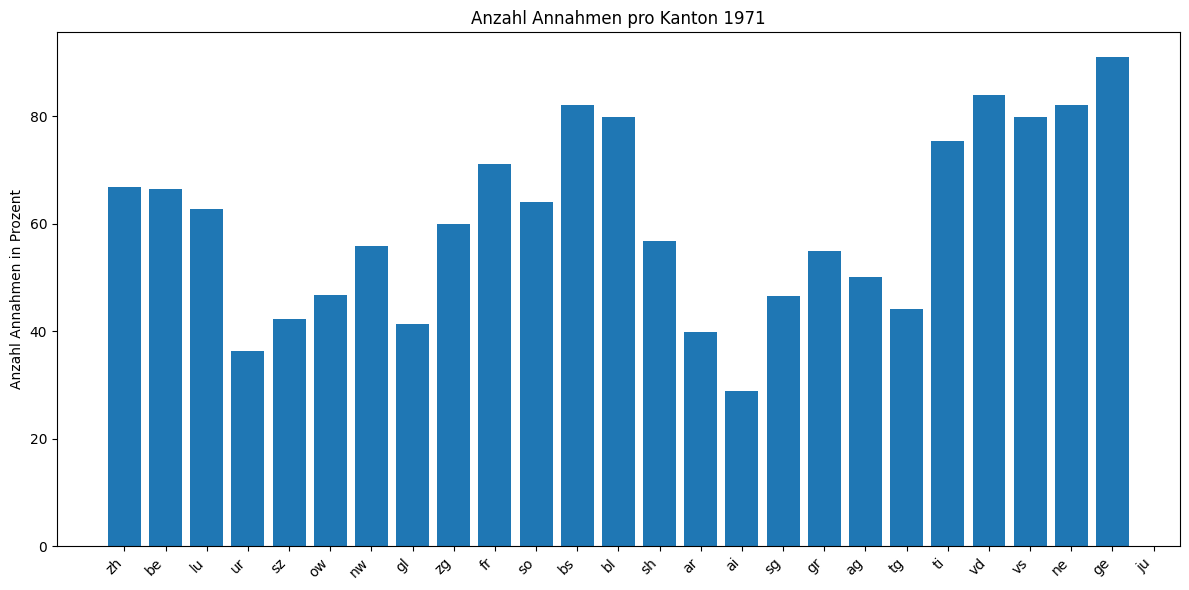

In [9]:
# Erstelle Visualisierung
# Figurengröße 12x6 Zoll für gute Lesbarkeit
fig, ax = plt.subplots(figsize=(12, 6))
# Erstelle Balkendiagramm
# Extract the only row as values
annahme_ablehnung_t = annahme_ablehnung.T

x_labels = annahme_ablehnung_t.index  # Column names as x-axis labels
y_values = annahme_ablehnung_t.iloc[:, 0]

ax.bar(x_labels, y_values)

# Formatiere die Darstellung
plt.xticks(rotation=45, ha='right')  # Drehe Beschriftungen für bessere Lesbarkeit
plt.title('Anzahl Annahmen pro Kanton 1971')
plt.ylabel('Anzahl Annahmen in Prozent')
plt.tight_layout()  # Optimiere Layout automatisch

# Plotte das Diagramm
plt.show()

# 2. Plot zeichnen
Hier wird der Plot der Wahlen von 1959 gezeichnet.

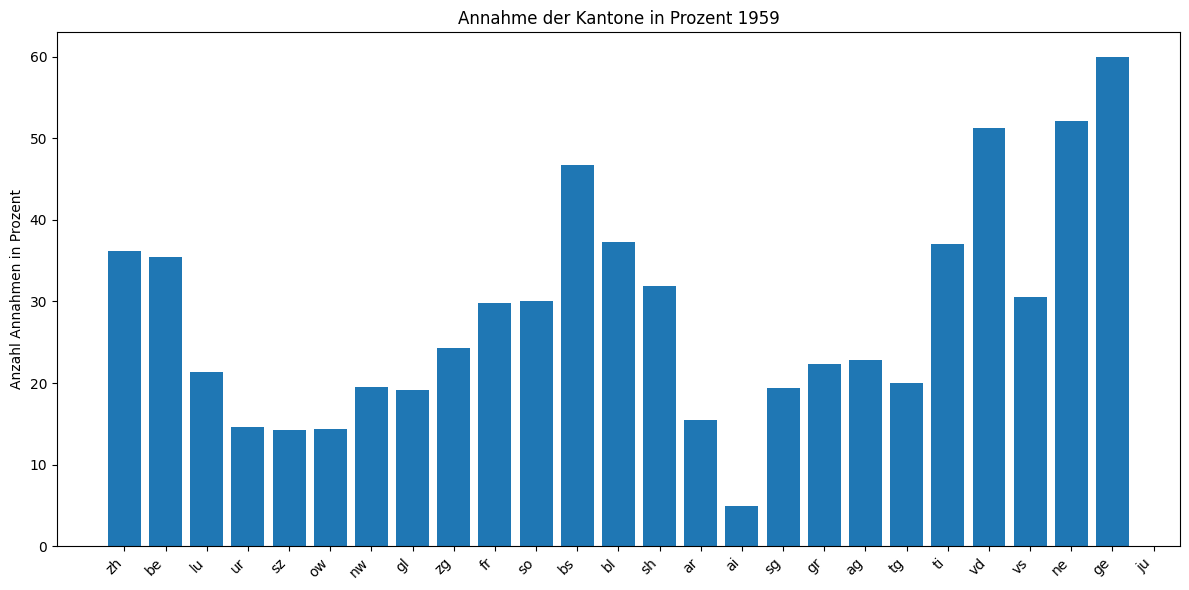

In [10]:
# Erstelle Visualisierung
# Figurengröße 12x6 Zoll für gute Lesbarkeit
fig2, ax = plt.subplots(figsize=(12, 6))
# Erstelle Balkendiagramm
# Extract the only row as values
annahme_ablehnung_1959_t = annahme_ablehnung_1959.T

x_labels = annahme_ablehnung_1959_t.index  # Column names as x-axis labels
y_values = annahme_ablehnung_1959_t.iloc[:, 0]

ax.bar(x_labels, y_values)

# Formatiere die Darstellung
plt.xticks(rotation=45, ha='right')  # Drehe Beschriftungen für bessere Lesbarkeit
plt.title('Annahme der Kantone in Prozent 1959')
plt.ylabel('Anzahl Annahmen in Prozent')
plt.tight_layout()  # Optimiere Layout automatisch

# Plotte das Diagramm
plt.show()